# Implementing a Neural Network
In this exercise we will develop a neural network with fully-connected layers to perform classification, and test it out on the CIFAR-10 dataset.

In [1]:
# A bit of setup

import numpy as np
import matplotlib.pyplot as plt

from dl4cv.classifiers.neural_net import TwoLayerNet

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
  """ returns relative error """
  return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

We will use the class `TwoLayerNet` in the file `dl4cv/classifiers/neural_net.py` to represent instances of our network. The network parameters are stored in the instance variable `self.params` where keys are string parameter names and values are numpy arrays. Below, we initialize toy data and a toy model that we will use to develop your implementation.

In [3]:
# Create a small net and some toy data to check your implementations.
# Note that we set the random seed for repeatable experiments.

input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5

def init_toy_model():
  np.random.seed(0)
  return TwoLayerNet(input_size, hidden_size, num_classes, std=1e-1)

def init_toy_data():
  np.random.seed(1)
  X = 10 * np.random.randn(num_inputs, input_size)
  y = np.array([0, 1, 2, 2, 1])
  return X, y

net = init_toy_model()
X, y = init_toy_data()

# Forward pass: compute scores
Open the file `dl4cv/classifiers/neural_net.py` and look at the method `TwoLayerNet.loss`. This function is very similar to the loss functions you have written for the Softmax exercise: It takes the data and weights and computes the class scores, the loss, and the gradients on the parameters. 

Implement the first part of the forward pass which uses the weights and biases to compute the scores for all inputs. Please first read the class description in the file, in particular note that for this exercise we use ReLU non-linearities.

In [4]:
scores = net.loss(X)
print('Your scores:')
print(scores)
print()
print('correct scores:')
correct_scores = np.asarray([
  [-0.81233741, -1.27654624, -0.70335995],
  [-0.17129677, -1.18803311, -0.47310444],
  [-0.51590475, -1.01354314, -0.8504215 ],
  [-0.15419291, -0.48629638, -0.52901952],
  [-0.00618733, -0.12435261, -0.15226949]])
print(correct_scores)
print()

# The difference should be very small. We get < 1e-7
print('Difference between your scores and correct scores:')
print(np.sum(np.abs(scores - correct_scores)))

Your scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

correct scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

Difference between your scores and correct scores:
3.68027207459e-08


# Forward pass: compute loss
In the same function, implement the second part that computes the data and regularizaion loss.

In [5]:
loss,_ = net.loss(X, y, reg=0.1)
correct_loss = 1.30378789133
scores.shape
# should be very small, we get < 1e-12
print('Difference between your loss and correct loss:')
print(np.sum(np.abs(loss - correct_loss)))

Difference between your loss and correct loss:
1.79634085384e-13


# Backward pass
Implement the rest of the function. This will compute the gradient of the loss with respect to the variables `W1`, `b1`, `W2`, and `b2`. Now that you (hopefully!) have a correctly implemented forward pass, you can debug your backward pass using a numeric gradient check:

In [6]:
from dl4cv.gradient_check import eval_numerical_gradient

# Use numeric gradient checking to check your implementation of the backward pass.
# If your implementation is correct, the difference between the numeric and
# analytic gradients should be less than 1e-8 for each of W1, W2, b1, and b2.

loss, grads = net.loss(X, y, reg=0.1)

# these should all be less than 1e-8 or so
for param_name in grads:
  f = lambda W: net.loss(X, y, reg=0.1)[0]
  param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
  print('%s max relative error: %e' % (param_name, rel_error(param_grad_num, grads[param_name])))

W2 max relative error: 3.440708e-09
b2 max relative error: 4.447615e-11
W1 max relative error: 3.561318e-09
b1 max relative error: 2.738420e-09


# Train the network
To train the network we will use stochastic gradient descent (SGD), similar to the Softmax classifier. Look at the function `TwoLayerNet.train` and fill in the missing sections to implement the training procedure. This should be very similar to the training procedure you used for the Softmax classifier. You will also have to implement `TwoLayerNet.predict`, as the training process periodically performs prediction to keep track of accuracy over time while the network trains.

Once you have implemented the method, run the code below to train a two-layer network on toy data. You should achieve a training loss less than 0.2.

Final training loss:  0.0171496079387


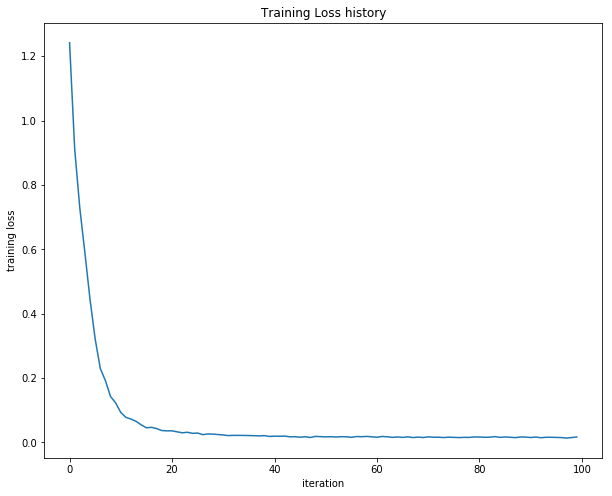

In [7]:
net = init_toy_model()
stats = net.train(X, y, X, y,
            learning_rate=1e-1, reg=1e-5,
            num_iters=100, verbose=False)

print('Final training loss: ', stats['loss_history'][-1])

# plot the loss history
plt.plot(stats['loss_history'])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

# Load the data
Now that you have implemented a two-layer network that passes gradient checks and works on toy data, it's time to load up our favorite CIFAR-10 data so we can use it to train a classifier on a real dataset.

Train data shape:  (48000, 3072)
Train labels shape:  (48000,)
Validation data shape:  (1000, 3072)
Validation labels shape:  (1000,)
Test data shape:  (1000, 3072)
Test labels shape:  (1000,)
dev data shape:  (500, 3072)
dev labels shape:  (500,)


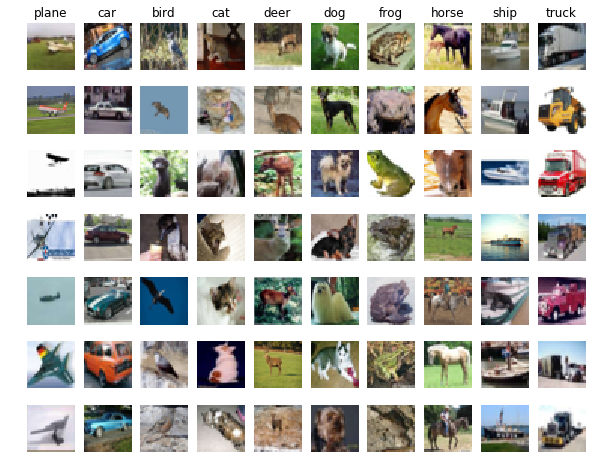

In [2]:
from dl4cv.data_utils import load_CIFAR10
from dl4cv.vis_utils import visualize_cifar10

def get_CIFAR10_data(num_training=48000, num_validation=1000, num_test=1000, num_dev=500):
    """
    Load the CIFAR-10 dataset from disk and perform preprocessing to prepare
    it for the linear classifier. 
    """
    # Load the raw CIFAR-10 data
    cifar10_dir = 'datasets/'
    X, y = load_CIFAR10(cifar10_dir)
    

    # Our training set will be the first num_train points from the original
    # training set.
    mask = range(num_training)
    X_train = X[mask]
    y_train = y[mask]
    
    
    # Our validation set will be num_validation points from the original
    # training set.
    mask = range(num_training, num_training + num_validation)
    X_val = X[mask]
    y_val = y[mask]
    
    # We use a small subset of the training set as our test set.
    mask = range(num_training + num_validation, num_training + num_validation + num_test)
    X_test = X[mask]
    y_test = y[mask]
    
    # We will also make a development set, which is a small subset of
    # the training set. This way the development cycle is faster.
    mask = np.random.choice(num_training, num_dev, replace=False)
    X_dev = X_train[mask]
    y_dev = y_train[mask]

    # Normalize the data: subtract the mean image
    mean_image = np.mean(X_train, axis = 0)
    X_train -= mean_image
    X_val -= mean_image
    X_test -= mean_image
    X_dev -= mean_image
    
    # Preprocessing: reshape the image data into rows
    X_train = np.reshape(X_train, (X_train.shape[0], -1))
    X_val = np.reshape(X_val, (X_val.shape[0], -1))
    X_test = np.reshape(X_test, (X_test.shape[0], -1))
    X_dev = np.reshape(X_dev, (X_dev.shape[0], -1))

    return X, y, X_train, y_train, X_val, y_val, X_test, y_test, X_dev, y_dev


# Invoke the above function to get our data.
X_raw, y_raw, X_train, y_train, X_val, y_val, X_test, y_test, X_dev, y_dev= get_CIFAR10_data()
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)
print('dev data shape: ', X_dev.shape)
print('dev labels shape: ', y_dev.shape)

# visualize raw data
visualize_cifar10(X_raw, y_raw)

# Train a network
To train our network we will use SGD with momentum. In addition, we will adjust the learning rate with an exponential learning rate schedule as optimization proceeds; after each epoch, we will reduce the learning rate by multiplying it by a decay rate.

In [ ]:
input_size = 32 * 32 * 3
hidden_size = 300
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)

# Train the network
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=2000, batch_size=200,
            learning_rate=0.0006, learning_rate_decay=0.95,
            reg=0.1, verbose=True)

# Predict on the validation set
val_acc = (net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)

iteration 0 / 2000: loss 2.303025
iteration 100 / 2000: loss 2.011619
iteration 200 / 2000: loss 1.749546
iteration 300 / 2000: loss 1.779350
iteration 400 / 2000: loss 1.624935
iteration 500 / 2000: loss 1.608715
iteration 600 / 2000: loss 1.576914
iteration 700 / 2000: loss 1.452879
iteration 800 / 2000: loss 1.588172
iteration 900 / 2000: loss 1.377257
iteration 1000 / 2000: loss 1.384292
iteration 1100 / 2000: loss 1.538123
iteration 1200 / 2000: loss 1.432939
iteration 1300 / 2000: loss 1.468808


# Debug the training
With the default parameters we provided above, you should get a validation accuracy of about 0.26 on the validation set. This isn't very good.

One strategy for getting insight into what's wrong is to plot the loss function and the accuracies on the training and validation sets during optimization.

Another strategy is to visualize the weights that were learned in the first layer of the network. In most neural networks trained on visual data, the first layer weights typically show some visible structure when visualized.

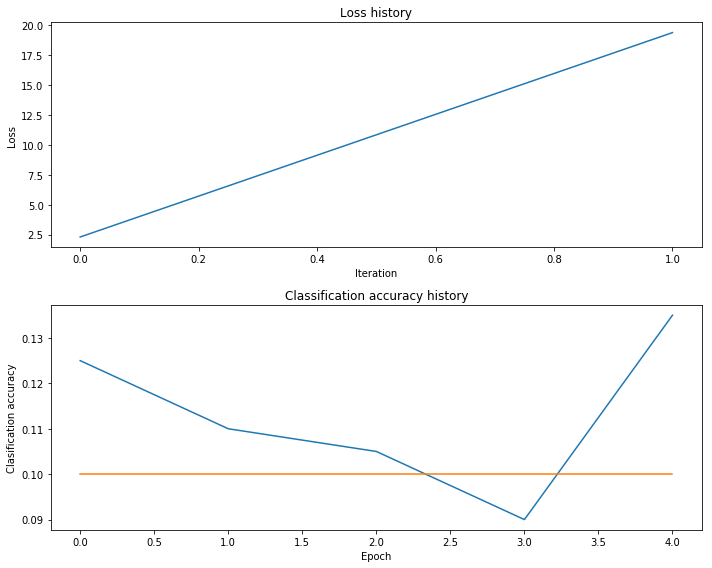

In [116]:
# Plot the loss function and train / validation accuracies
plt.subplots(nrows=2, ncols=1)

plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')

plt.tight_layout()
plt.show()

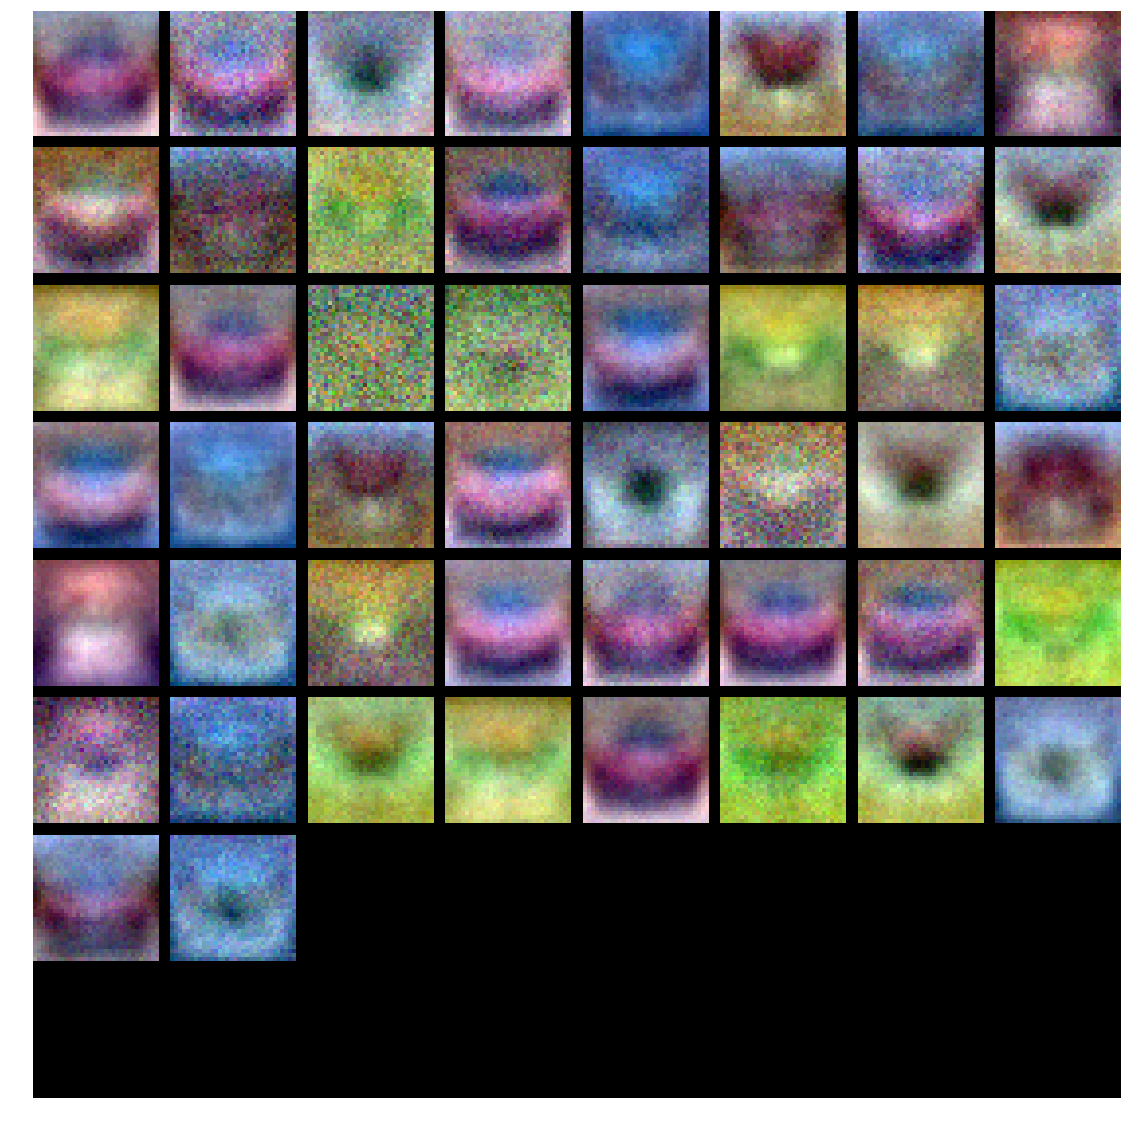

In [91]:
from dl4cv.vis_utils import visualize_grid

# Visualize the weights of the network

def show_net_weights(net):
    fig = plt.figure(figsize=(20,20))
    W1 = net.params['W1']
    W1 = W1.reshape(32, 32, 3, -1).transpose(3, 0, 1, 2)
    plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
    plt.gca().axis('off')
    plt.show()

show_net_weights(net)

# Tune your hyperparameters

**What's wrong?**. Looking at the visualizations above, we see that the loss is decreasing more or less linearly, which seems to suggest that the learning rate may be too low. Moreover, there is no gap between the training and validation accuracy, suggesting that the model we used has low capacity, and that we should increase its size. On the other hand, with a very large model we would expect to see more overfitting, which would manifest itself as a very large gap between the training and validation accuracy.

**Tuning**. Tuning the hyperparameters and developing intuition for how they affect the final performance is a large part of using Neural Networks, so we want you to get a lot of practice. Below, you should experiment with different values of the various hyperparameters, including hidden layer size, learning rate, numer of training epochs, and regularization strength. You might also consider tuning the learning rate decay, but you should be able to get good performance using the default value.

**Approximate results**. You should aim to achieve a classification accuracy of greater than 48% on the validation set.

**Experiment**: You goal in this exercise is to get as good of a result on CIFAR-10 as you can, with a fully-connected Neural Network. Feel free implement your own techniques (e.g. PCA to reduce dimensionality, or adding dropout, or adding features to the solver, etc.).


**We highly encourage you to use this opportunity to get a feel for your machine learning system. Consider this kind of tuning as an essential part of getting the most out of your neural network**

In [3]:
from dl4cv.classifiers.neural_net import TwoLayerNet
best_net = None # store the best model into this 

#################################################################################
# TODO: Tune hyperparameters using the validation set. Store your best trained  #
# model in best_net.                                                            #
#                                                                               #
# To help debug your network, it may help to use visualizations similar to the  #
# ones we used above; these visualizations will have significant qualitative    #
# differences from the ones we saw above for the poorly tuned network.          #
#                                                                               #
# Tweaking hyperparameters by hand can be fun, but you might find it useful to  #
# write code to sweep through possible combinations of hyperparameters          #
# automatically like we did on the previous exercises.                          #
#################################################################################

input_size = 32*32*3
num_classes = 10

results = {}
best_neural_net = None
best_val_acc = -1.0

hidden_sizes = [100, 140, 160, 200]
learning_rates = [6e-7, 1e-6, 3e-6, 1e-5, 3e-5, 6e-5, 1e-4, 3e-4, 6e-4, 1e-3, 3e-3, 6e-3]
regularization_strengths = [1e-4, 1e-3, 1e-2, 1e-1, 1, 10]
num_iters = [500,1000]

for hidden_size in hidden_sizes:
    for learning_rate in learning_rates:
        for regularization_strength in regularization_strengths:
            for num_iter in num_iters:
        
                neural_net = TwoLayerNet(input_size, hidden_size, num_classes)

                history = neural_net.train(X_dev,y_dev,X_val,y_val,learning_rate=learning_rate
                                           ,reg=regularization_strength, num_iters=num_iter
                                           , batch_size=200,verbose=False)

                train_acc = np.mean(neural_net.predict(X_dev) == y_dev)
                val_acc = np.mean(neural_net.predict(X_val) == y_val)

                if val_acc > best_val_acc:
                    best_val_acc = val_acc
                    best_neural_net = neural_net

                results[(hidden_size,learning_rate, regularization_strength, num_iter)] = (train_acc,val_acc)
                
                print("finished:")
                print("hidden size:%f || learning rate:%f || regularization strength:%f || num iter:%f" %
                     (hidden_size,learning_rate,regularization_strength,num_iter))
                print("with:")
                print("training accuracy:%f || validation accuracy:%f" %
                     (train_acc,val_acc))
                print("------------------------------------------------------------------")
        
        
print("Best accuracy on the validation set:%f" % best_val_acc)

#################################################################################
#                               END OF YOUR CODE                                #
#################################################################################

finished:
hidden size:100.000000 || learning rate:0.000100 || regularization strength:0.000100 || num iter:1000.000000
with:
training accuracy:0.248000 || validation accuracy:0.203000
------------------------------------------------------------------
finished:
hidden size:100.000000 || learning rate:0.000100 || regularization strength:0.000100 || num iter:1500.000000
with:
training accuracy:0.220000 || validation accuracy:0.171000
------------------------------------------------------------------
finished:
hidden size:100.000000 || learning rate:0.000100 || regularization strength:0.000100 || num iter:2000.000000
with:
training accuracy:0.198000 || validation accuracy:0.171000
------------------------------------------------------------------
finished:
hidden size:100.000000 || learning rate:0.000100 || regularization strength:0.000100 || num iter:2500.000000
with:
training accuracy:0.248000 || validation accuracy:0.186000
---------------------------------------------------------------

finished:
hidden size:100.000000 || learning rate:0.000500 || regularization strength:0.100000 || num iter:1500.000000
with:
training accuracy:0.214000 || validation accuracy:0.171000
------------------------------------------------------------------
finished:
hidden size:100.000000 || learning rate:0.000500 || regularization strength:0.100000 || num iter:2000.000000
with:
training accuracy:0.166000 || validation accuracy:0.137000
------------------------------------------------------------------
finished:
hidden size:100.000000 || learning rate:0.000500 || regularization strength:0.100000 || num iter:2500.000000
with:
training accuracy:0.188000 || validation accuracy:0.149000
------------------------------------------------------------------
finished:
hidden size:100.000000 || learning rate:0.000500 || regularization strength:1.000000 || num iter:1000.000000
with:
training accuracy:0.200000 || validation accuracy:0.173000
---------------------------------------------------------------

finished:
hidden size:100.000000 || learning rate:0.005000 || regularization strength:0.001000 || num iter:2000.000000
with:
training accuracy:0.886000 || validation accuracy:0.342000
------------------------------------------------------------------
finished:
hidden size:100.000000 || learning rate:0.005000 || regularization strength:0.001000 || num iter:2500.000000
with:
training accuracy:0.884000 || validation accuracy:0.334000
------------------------------------------------------------------
finished:
hidden size:100.000000 || learning rate:0.005000 || regularization strength:0.010000 || num iter:1000.000000
with:
training accuracy:0.866000 || validation accuracy:0.317000
------------------------------------------------------------------
finished:
hidden size:100.000000 || learning rate:0.005000 || regularization strength:0.010000 || num iter:1500.000000
with:
training accuracy:0.862000 || validation accuracy:0.330000
---------------------------------------------------------------

C:\Users\Janis\Homework\Deeplearning\HW1\dl4cv\exercise_1\dl4cv\classifiers\neural_net.py:112: RuntimeWarning: divide by zero encountered in log
  loss = (-1)*np.sum(np.log(softmax))/ N + 0.5*reg*( np.sum(np.multiply(W1,W1))+np.sum(np.multiply(W2,W2)))
C:\Users\Janis\Homework\Deeplearning\HW1\dl4cv\exercise_1\dl4cv\classifiers\neural_net.py:104: RuntimeWarning: overflow encountered in exp
  normFactors = np.sum(np.exp(scores-meanScores),axis=1)
C:\Users\Janis\Homework\Deeplearning\HW1\dl4cv\exercise_1\dl4cv\classifiers\neural_net.py:110: RuntimeWarning: overflow encountered in exp
  softmax = np.divide(np.exp(correctPredictionVector - meanScores),normFactors)
C:\Users\Janis\Homework\Deeplearning\HW1\dl4cv\exercise_1\dl4cv\classifiers\neural_net.py:110: RuntimeWarning: invalid value encountered in true_divide
  softmax = np.divide(np.exp(correctPredictionVector - meanScores),normFactors)
C:\Users\Janis\Homework\Deeplearning\HW1\dl4cv\exercise_1\dl4cv\classifiers\neural_net.py:126: Runti

finished:
hidden size:100.000000 || learning rate:0.010000 || regularization strength:0.000100 || num iter:1000.000000
with:
training accuracy:0.100000 || validation accuracy:0.100000
------------------------------------------------------------------
finished:
hidden size:100.000000 || learning rate:0.010000 || regularization strength:0.000100 || num iter:1500.000000
with:
training accuracy:0.100000 || validation accuracy:0.100000
------------------------------------------------------------------
finished:
hidden size:100.000000 || learning rate:0.010000 || regularization strength:0.000100 || num iter:2000.000000
with:
training accuracy:0.100000 || validation accuracy:0.100000
------------------------------------------------------------------
finished:
hidden size:100.000000 || learning rate:0.010000 || regularization strength:0.000100 || num iter:2500.000000
with:
training accuracy:0.100000 || validation accuracy:0.100000
---------------------------------------------------------------

finished:
hidden size:140.000000 || learning rate:0.000100 || regularization strength:0.100000 || num iter:1500.000000
with:
training accuracy:0.218000 || validation accuracy:0.174000
------------------------------------------------------------------
finished:
hidden size:140.000000 || learning rate:0.000100 || regularization strength:0.100000 || num iter:2000.000000
with:
training accuracy:0.206000 || validation accuracy:0.150000
------------------------------------------------------------------
finished:
hidden size:140.000000 || learning rate:0.000100 || regularization strength:0.100000 || num iter:2500.000000
with:
training accuracy:0.198000 || validation accuracy:0.186000
------------------------------------------------------------------
finished:
hidden size:140.000000 || learning rate:0.000100 || regularization strength:1.000000 || num iter:1000.000000
with:
training accuracy:0.230000 || validation accuracy:0.164000
---------------------------------------------------------------

finished:
hidden size:140.000000 || learning rate:0.001000 || regularization strength:0.001000 || num iter:2000.000000
with:
training accuracy:0.204000 || validation accuracy:0.176000
------------------------------------------------------------------
finished:
hidden size:140.000000 || learning rate:0.001000 || regularization strength:0.001000 || num iter:2500.000000
with:
training accuracy:0.200000 || validation accuracy:0.175000
------------------------------------------------------------------
finished:
hidden size:140.000000 || learning rate:0.001000 || regularization strength:0.010000 || num iter:1000.000000
with:
training accuracy:0.206000 || validation accuracy:0.180000
------------------------------------------------------------------
finished:
hidden size:140.000000 || learning rate:0.001000 || regularization strength:0.010000 || num iter:1500.000000
with:
training accuracy:0.224000 || validation accuracy:0.185000
---------------------------------------------------------------

finished:
hidden size:140.000000 || learning rate:0.005000 || regularization strength:1.000000 || num iter:2500.000000
with:
training accuracy:0.882000 || validation accuracy:0.337000
------------------------------------------------------------------
finished:
hidden size:140.000000 || learning rate:0.010000 || regularization strength:0.000100 || num iter:1000.000000
with:
training accuracy:0.100000 || validation accuracy:0.100000
------------------------------------------------------------------
finished:
hidden size:140.000000 || learning rate:0.010000 || regularization strength:0.000100 || num iter:1500.000000
with:
training accuracy:0.100000 || validation accuracy:0.100000
------------------------------------------------------------------
finished:
hidden size:140.000000 || learning rate:0.010000 || regularization strength:0.000100 || num iter:2000.000000
with:
training accuracy:0.100000 || validation accuracy:0.100000
---------------------------------------------------------------

finished:
hidden size:160.000000 || learning rate:0.000100 || regularization strength:0.100000 || num iter:1000.000000
with:
training accuracy:0.262000 || validation accuracy:0.211000
------------------------------------------------------------------
finished:
hidden size:160.000000 || learning rate:0.000100 || regularization strength:0.100000 || num iter:1500.000000
with:
training accuracy:0.224000 || validation accuracy:0.171000
------------------------------------------------------------------
finished:
hidden size:160.000000 || learning rate:0.000100 || regularization strength:0.100000 || num iter:2000.000000
with:
training accuracy:0.188000 || validation accuracy:0.155000
------------------------------------------------------------------
finished:
hidden size:160.000000 || learning rate:0.000100 || regularization strength:0.100000 || num iter:2500.000000
with:
training accuracy:0.208000 || validation accuracy:0.158000
---------------------------------------------------------------

finished:
hidden size:160.000000 || learning rate:0.001000 || regularization strength:0.001000 || num iter:1500.000000
with:
training accuracy:0.200000 || validation accuracy:0.179000
------------------------------------------------------------------
finished:
hidden size:160.000000 || learning rate:0.001000 || regularization strength:0.001000 || num iter:2000.000000
with:
training accuracy:0.222000 || validation accuracy:0.184000
------------------------------------------------------------------
finished:
hidden size:160.000000 || learning rate:0.001000 || regularization strength:0.001000 || num iter:2500.000000
with:
training accuracy:0.222000 || validation accuracy:0.186000
------------------------------------------------------------------
finished:
hidden size:160.000000 || learning rate:0.001000 || regularization strength:0.010000 || num iter:1000.000000
with:
training accuracy:0.200000 || validation accuracy:0.177000
---------------------------------------------------------------

finished:
hidden size:160.000000 || learning rate:0.005000 || regularization strength:1.000000 || num iter:2000.000000
with:
training accuracy:0.886000 || validation accuracy:0.319000
------------------------------------------------------------------
finished:
hidden size:160.000000 || learning rate:0.005000 || regularization strength:1.000000 || num iter:2500.000000
with:
training accuracy:0.896000 || validation accuracy:0.334000
------------------------------------------------------------------
finished:
hidden size:160.000000 || learning rate:0.010000 || regularization strength:0.000100 || num iter:1000.000000
with:
training accuracy:0.100000 || validation accuracy:0.100000
------------------------------------------------------------------
finished:
hidden size:160.000000 || learning rate:0.010000 || regularization strength:0.000100 || num iter:1500.000000
with:
training accuracy:0.100000 || validation accuracy:0.100000
---------------------------------------------------------------

finished:
hidden size:200.000000 || learning rate:0.000100 || regularization strength:0.010000 || num iter:2500.000000
with:
training accuracy:0.238000 || validation accuracy:0.181000
------------------------------------------------------------------
finished:
hidden size:200.000000 || learning rate:0.000100 || regularization strength:0.100000 || num iter:1000.000000
with:
training accuracy:0.240000 || validation accuracy:0.186000
------------------------------------------------------------------
finished:
hidden size:200.000000 || learning rate:0.000100 || regularization strength:0.100000 || num iter:1500.000000
with:
training accuracy:0.228000 || validation accuracy:0.196000
------------------------------------------------------------------
finished:
hidden size:200.000000 || learning rate:0.000100 || regularization strength:0.100000 || num iter:2000.000000
with:
training accuracy:0.198000 || validation accuracy:0.161000
---------------------------------------------------------------

finished:
hidden size:200.000000 || learning rate:0.001000 || regularization strength:0.001000 || num iter:1000.000000
with:
training accuracy:0.216000 || validation accuracy:0.180000
------------------------------------------------------------------
finished:
hidden size:200.000000 || learning rate:0.001000 || regularization strength:0.001000 || num iter:1500.000000
with:
training accuracy:0.216000 || validation accuracy:0.181000
------------------------------------------------------------------
finished:
hidden size:200.000000 || learning rate:0.001000 || regularization strength:0.001000 || num iter:2000.000000
with:
training accuracy:0.212000 || validation accuracy:0.183000
------------------------------------------------------------------
finished:
hidden size:200.000000 || learning rate:0.001000 || regularization strength:0.001000 || num iter:2500.000000
with:
training accuracy:0.222000 || validation accuracy:0.188000
---------------------------------------------------------------

finished:
hidden size:200.000000 || learning rate:0.005000 || regularization strength:1.000000 || num iter:1500.000000
with:
training accuracy:0.902000 || validation accuracy:0.334000
------------------------------------------------------------------
finished:
hidden size:200.000000 || learning rate:0.005000 || regularization strength:1.000000 || num iter:2000.000000
with:
training accuracy:0.894000 || validation accuracy:0.337000
------------------------------------------------------------------
finished:
hidden size:200.000000 || learning rate:0.005000 || regularization strength:1.000000 || num iter:2500.000000
with:
training accuracy:0.894000 || validation accuracy:0.337000
------------------------------------------------------------------
finished:
hidden size:200.000000 || learning rate:0.010000 || regularization strength:0.000100 || num iter:1000.000000
with:
training accuracy:0.100000 || validation accuracy:0.100000
---------------------------------------------------------------

In [5]:
results

{(100, 0.0001, 0.0001, 100): (0.27200000000000002, 0.19700000000000001),
 (100, 0.0001, 0.0001, 500): (0.20200000000000001, 0.17699999999999999),
 (100, 0.0001, 0.0001, 1000): (0.26400000000000001, 0.20599999999999999),
 (100, 0.0001, 0.001, 100): (0.22800000000000001, 0.17799999999999999),
 (100, 0.0001, 0.001, 500): (0.26200000000000001, 0.20699999999999999),
 (100, 0.0001, 0.001, 1000): (0.25, 0.16600000000000001),
 (100, 0.0001, 0.01, 100): (0.26600000000000001, 0.182),
 (100, 0.0001, 0.01, 500): (0.25, 0.20300000000000001),
 (100, 0.0001, 0.01, 1000): (0.26800000000000002, 0.20599999999999999),
 (100, 0.0001, 0.1, 100): (0.26800000000000002, 0.19600000000000001),
 (100, 0.0001, 0.1, 500): (0.26600000000000001, 0.188),
 (100, 0.0001, 0.1, 1000): (0.224, 0.19800000000000001),
 (100, 0.0001, 1, 100): (0.248, 0.189),
 (100, 0.0001, 1, 500): (0.22600000000000001, 0.20000000000000001),
 (100, 0.0001, 1, 1000): (0.26000000000000001, 0.191),
 (100, 0.0005, 0.0001, 100): (0.188, 0.17799999

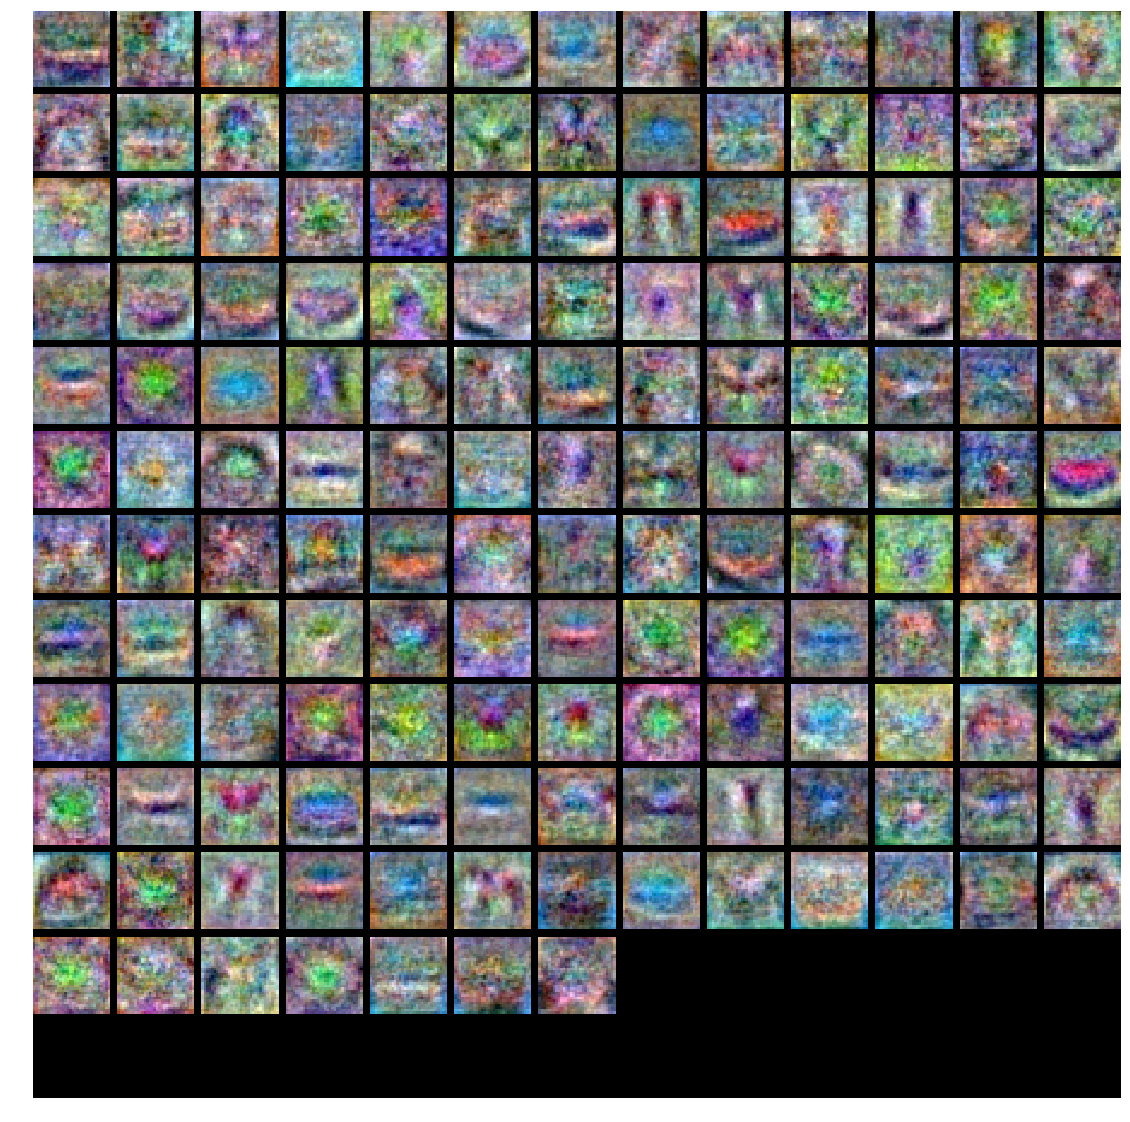

In [131]:
# visualize the weights of the best network
show_net_weights(best_neural_net)

<div class="alert alert-info">
    <h3>Inline Question</h3>
    <p>Describe what your visualized two-layer-net weights look like, in particular in contrast to the softmax weights of the first exercise of this set.</p>
</div>

# Run on the test set
When you are done experimenting, you should evaluate your final trained network on the test set; you should get above 48%.

In [22]:
test_acc = (net.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)

Test accuracy:  0.549


## Save the model

When you are satisfied with your training, save the model for submission.

In [23]:
from dl4cv.model_savers import save_two_layer_net
save_two_layer_net(net)

## Scoring function
We will score the model you have just saved based on the classification accuracy on our test dataset. The scoring function should represent the difficulty of obtaining a good test accuracy and should therefore give 0 points for worse results than random guessing, should be linear in a first regime and exponential beyond that. The onset of exponential growth depends on the problem. In that region you get twice as many points for an additional 10% accuracy.

For this problem we specifically use the following scoring function:

$$f(x) = \left\{
	\begin{array}{ll}
		0  & \mbox{if } x \leq 0.1 \\
		100x & \mbox{if } 0.1 < x \leq 0.5 \\
        \left(\frac{50}{\exp(0.5 \ln(2)/0.1)}\right) \exp(x \ln(2)/0.1) & \mbox{if } 0.5 < x \leq 1
	\end{array}
\right.$$

The function can be plotted in the following cell.

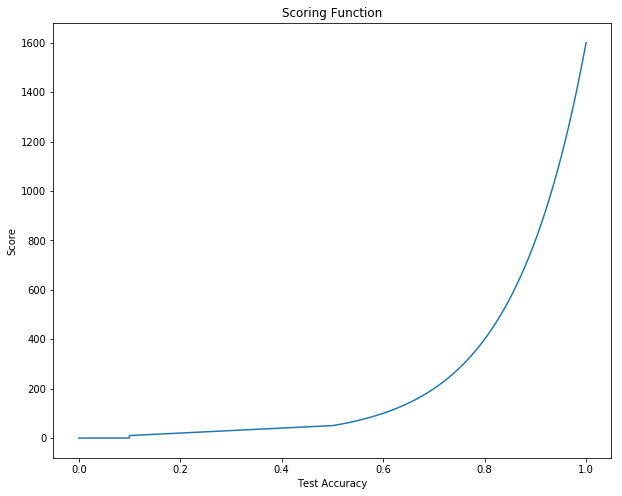

In [109]:
from dl4cv.data_utils import scoring_function

x = np.linspace(0, 1, num=1000)
plt.plot(x, scoring_function(x, lin_exp_boundary=0.5, doubling_rate=0.1))
plt.title('Scoring Function')
plt.xlabel('Test Accuracy')
plt.ylabel('Score')
plt.show()